In [6]:
#불필요한 특수기호 제거하는 전처리 함수
from krwordrank.hangle import normalize

texts = ['이것은 예문입니다', '각자의 데이터를 준비하세요','삐링뿡빠리뽕#*:#2 내가 king']
texts = [normalize(text, english=True, number=False) for text in texts]

print(texts)


['이것은 예문입니다', '각자의 데이터를 준비하세요', '삐링뿡빠리뽕 내가 king']


In [26]:
import pandas as pd

df = pd.read_csv('C:/work/python/Asia_GAN/myproject/reviews_2016.csv', encoding='utf-8')
df.info()
title_list = df.titles.unique().tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  551 non-null    int64 
 1   titles      551 non-null    object
 2   reviews     551 non-null    object
dtypes: int64(1), object(2)
memory usage: 13.0+ KB


In [35]:
is_title = df.titles == title_list[0]
texts =  df[is_title].reviews
texts = [normalize(text, english=False, number=False) for text in texts]
print(len(texts))

50


In [36]:
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

scan vocabs ... 
num vocabs = 1580
done


In [51]:
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

      영화:	15.0034
      미국:	9.4734
     마이클:	8.4338
      시간:	7.6056
      베이:	7.0783
      감독:	5.1062
     리비아:	5.0278
      정말:	4.8849
     벵가지:	4.6103
      위해:	4.4628
      테러:	3.9359
      있는:	3.5459
      액션:	3.2244
      명의:	3.1712
      하는:	3.1269
      이런:	2.7524
      사건:	2.7339
      개봉:	2.7155
     하지만:	2.6063
   트랜스포머:	2.5433
      사람:	2.4676
      용병:	2.4671
      작품:	2.4172
      실제:	2.3558
     그리고:	2.3432
      평점:	2.2447
      다른:	2.0934
     파블로:	2.0495
      장면:	2.0262
      대사:	2.0131


In [44]:
stopwords = {'영화', '감독', '위해', '있는', '하는', '관람객', '너무', '정말', '보고', '그리고', '이런', '하지만', '평점', '개봉'}
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}
print(passwords)

{'미국': 9.473418941347562, '마이클': 8.433841960732968, '시간': 7.605551393096521, '베이': 7.078311409110003, '리비아': 5.027777131759077, '벵가지': 4.610348058446929, '테러': 3.9359029752213606, '액션': 3.2243749452879142, '명의': 3.171207395260583, '사건': 2.7339223314532686, '트랜스포머': 2.543283051398324, '사람': 2.4675841725738534, '용병': 2.467078175418199, '작품': 2.417162068739832, '실제': 2.355773858912971, '다른': 2.0934139171956305, '파블로': 2.0494914755300795, '장면': 2.026196207095285, '대사': 2.0130722851082754, '출연': 2.009313788921114, '제임스': 1.9935486829263231, '무장': 1.9738326527613959, '물론': 1.9641434863668428, '많이': 1.882622138035602, '그런': 1.875546711438592, '당시': 1.840097561872947, '작전을': 1.7736951442827995, '실화': 1.735867088665894, '영사관': 1.7284281564483384, '전쟁': 1.7196302706597004, '민간': 1.6830246878844446, '뱃지': 1.6599365082711488, '맥스': 1.656929285588209, '리뷰': 1.6361581081500485, '전투': 1.59243774086795, '있습니다': 1.5630417451743406, '연출': 1.5625300442207362, '합니다': 1.5290045050222716, '쉬레이버': 1.52608991

In [47]:
from wordcloud import WordCloud

# Set your font path
font_path = './Jalnan.ttf'

krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

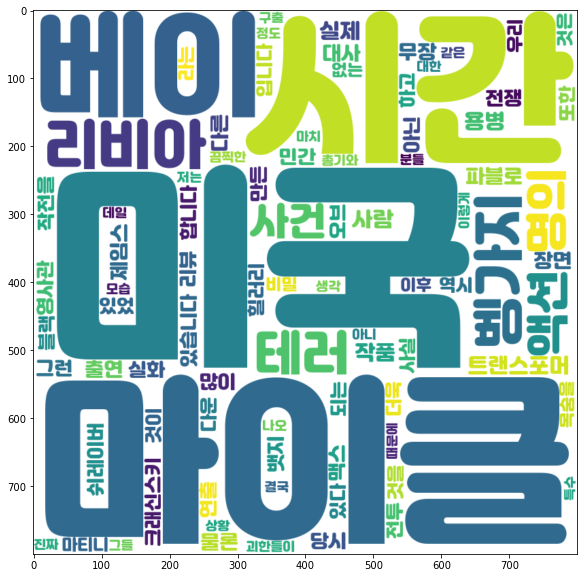

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()